# COMP0124: Multi-Agent Artificial Intelligence

# Group project: Real-time bidding auctions

**Group #7: Oliviero Balbinetti, Mauricio Caballero, Paul Melkert**

Importing libraries.

In [1]:
import os
import sys
import math
import random
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score

Defining functions.

In [2]:
#Inizialising weight.
def Initialize_weight(Initial_weight):
    return (random.random() - 0.5)*Initial_weight

#Sigmoid function.
def sigmoid_function(value):
    return 1.0/(1.0 + math.exp(-value))

Importing data in pandas DataFrames.

In [3]:
#Defining directory.
Path = '/Users/olivierobalbinetti/Desktop/University College London/Term 2/'\
       'Multi Agents Artificial Intelligence/Courseworks/Group coursework/'\
       'Data/Feature engineering'

#Importing data.
Datasets = {}
os.chdir(Path)
for Filename in glob('*.csv'):
    Datasets[Filename[:-4].title()] = pd.read_csv(Filename, sep = ',')
    
#Defining variables.
Train = Datasets['Train']
Validation = Datasets['Validation']

Click-throught rate estimation.

In [4]:
#Logistic regression model.
random.seed(10)
print('Click-throught rate estimation: logistic regression model.\n')

#Defining directory.
Path = '/Users/olivierobalbinetti/Desktop/University College London/Term 2/'\
       'Multi Agents Artificial Intelligence/Courseworks/Group coursework/'\
       'Data/Predicted CTR'

os.chdir(Path)

#Defining general variables.
Eta = 0.01
Epoch = 20
Lambda = 1*10**(-6)
Batch_size = 1000000

Feature_weights = {}
Initial_weight = 0.05

#Looping on epoch.
for epoch in range(0, Epoch):
    Flag = 0
    
    Click = Train['click'].values
    Payprice = Train['payprice'].values
    Feature = Train['feature'].str.split(' ').values
    
    #Looping for training.
    while (Flag*Batch_size < len(Train)):
        Train_click = Click[Flag*Batch_size:(Flag+1)*Batch_size]
        Train_feature = Feature[Flag*Batch_size:(Flag+1)*Batch_size]
        Train_payprice = Payprice[Flag*Batch_size:(Flag+1)*Batch_size]
        
        #Looping on batches.
        for request in range(0, len(Train_feature)):
            prediction = 0.
            
            clk = Train_click[request]
            price = Train_payprice[request]
            feature = [int(x) for x in Train_feature[request]]
            
            for feat in feature:
                if feat not in Feature_weights:
                    Feature_weights[feat] = Initialize_weight(Initial_weight)
                    
                prediction += Feature_weights[feat]
            prediction = sigmoid_function(prediction)
            
            for feat in feature:
                Feature_weights[feat] = Feature_weights[feat]*(1-Lambda)\
                                        + Eta*(clk-prediction)
        Flag += 1
    
    #Looping for testing.
    True_values = []
    Predicted_values = []
    
    Click = Validation['click'].values
    Payprice = Validation['payprice'].values
    Feature = Validation['feature'].str.split(' ')
    
    for request in range(0, len(Feature)):
        prediction = 0.
        
        clk = Click[request]
        price = Payprice[request]
        feature = [int(x) for x in Feature[request]]
        
        for feat in feature:
            if feat in Feature_weights:
                prediction += Feature_weights[feat]
        prediction = sigmoid_function(prediction)
        
        True_values.append(clk)
        Predicted_values.append(prediction)
        
    #Estimating preformance.
    auc = roc_auc_score(True_values, Predicted_values)
    rmse = math.sqrt(mean_squared_error(True_values, Predicted_values))
    print('[Epoch: %d]: auc = %.4f, rmse = %.4f' %(epoch, auc, rmse))
    
#Saving weights.
Filename = 'Logistic regression weights' + '.csv'
Header = 'feature code,weight'

with open(Filename, 'w') as file:
    file.write(Header + '\n')
    Feature_values = sorted(Feature_weights.items(), key=operator.itemgetter(0))
    
    for item in Feature_values:
        file.write(str(item[0]) + ',' + str(item[1]) + '\n')
        
    print('\n• [File %s]: Process completed!' %Filename)
        
#Saving predictions.
Filename = 'CTR estimation (Validation)' + '.csv'
Header = 'bidid,pCTR'

with open(Filename, 'w') as file:
    file.write(Header + '\n')
    
    for request in range(0, len(Validation)):
        prediction = 0.
        feature = [int(x) for x in Feature[request]]
        
        for feat in feature:
            if feat in Feature_weights:
                prediction += Feature_weights[feat]
        prediction = sigmoid_function(prediction)
        
        file.write(Validation['bidid'].iloc[request] + ',' + 
                   str(prediction) + '\n')
          
    print('• [File %s]: Process completed!' %Filename)

Click-throught rate estimation: logistic regression model.

[Epoch: 0]: auc = 0.7871, rmse = 0.0257
[Epoch: 1]: auc = 0.7934, rmse = 0.0256
[Epoch: 2]: auc = 0.7974, rmse = 0.0256
[Epoch: 3]: auc = 0.8014, rmse = 0.0256
[Epoch: 4]: auc = 0.8049, rmse = 0.0256
[Epoch: 5]: auc = 0.8078, rmse = 0.0256
[Epoch: 6]: auc = 0.8101, rmse = 0.0256
[Epoch: 7]: auc = 0.8121, rmse = 0.0256
[Epoch: 8]: auc = 0.8137, rmse = 0.0256
[Epoch: 9]: auc = 0.8150, rmse = 0.0256
[Epoch: 10]: auc = 0.8161, rmse = 0.0256
[Epoch: 11]: auc = 0.8170, rmse = 0.0256
[Epoch: 12]: auc = 0.8178, rmse = 0.0256
[Epoch: 13]: auc = 0.8185, rmse = 0.0256
[Epoch: 14]: auc = 0.8191, rmse = 0.0256
[Epoch: 15]: auc = 0.8196, rmse = 0.0256
[Epoch: 16]: auc = 0.8201, rmse = 0.0256
[Epoch: 17]: auc = 0.8205, rmse = 0.0256
[Epoch: 18]: auc = 0.8208, rmse = 0.0256
[Epoch: 19]: auc = 0.8212, rmse = 0.0256

• [File Logistic regression weights.csv]: Process completed!
• [File CTR estimation (Validation).csv]: Process completed!


Model performance visualization.

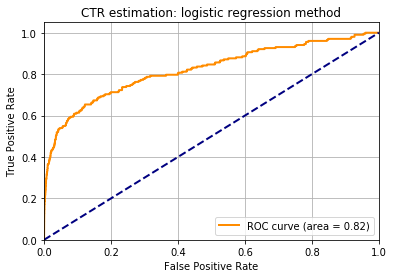

In [5]:
roc_auc = dict()
fpr, tpr, _ = roc_curve(True_values, Predicted_values)
roc_auc = roc_auc_score(True_values, Predicted_values)

plt.figure()
plt.title('CTR estimation: logistic regression method')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)'
         % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.legend(loc = 'lower right')
plt.grid()
plt.show()